In [60]:
# 0.导入必要的库；导入数据集将数据集命名为crime，文件为：
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
apple = pd.read_csv(r'../exercise_data/Apple_stock.csv')
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [61]:
len(apple.Open.notnull())

8465

In [62]:
a['last_colse']=a.shift(-1)['Adj Close'] # ???? 回去搞清楚  搞清楚了 因为时间是升序的 所以 需要shift -1 
a['i_s']=(a['Adj Close']-a['last_colse'])/a['last_colse'] # 涨跌幅=(现价-上一个交易日收盘价)/上一个交易日收盘价*100%
# # a['i_s']=(a['Adj Close']-a['last_adj'])/a['last_adj'] # 涨跌幅=(现价-上一个交易日收盘价)/上一个交易日收盘价*100%
a.sort_values(by='i_s',ascending=False).loc[:,'Volume'] # 这loc是根据index进行选择 而不是位置
a.sort_values(by='i_s',ascending=False).iloc[0].Volume # 
a[a.i_s==a.i_s.max()]

,Date,Open,High,Low,Close,Volume,Adj Close,last_colse,i_s
4256,1997-08-06,25.25,27.75,25.0,26.31,1047620000,0.9,0.67,0.343284


In [64]:
# 5.将Date这个列转换为datetime类型
apple['Date'] = pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
 7   month      8465 non-null   object        
 8   lastdate   8464 non-null   float64       
 9   dt         8464 non-null   float64       
 10  year       8465 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 793.6+ KB


In [66]:
# 6.将Date设置为索引
apple.index = apple['Date']
apple

,Date,Open,High,Low,Close,Volume,Adj Close,month,lastdate,dt,year
Date,,,,,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07,95.97,-0.62,2014
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07,94.03,1.94,2014
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07,93.48,0.55,2014
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014-07,93.52,-0.04,2014
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014-07,92.93,0.59,2014
...,...,...,...,...,...,...,...,...,...,...,...
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980-12,0.40,0.01,1980
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980-12,0.39,0.01,1980
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12,0.42,-0.03,1980


In [67]:
# 7.判断是否有重复的日期
apple['Date'].duplicated()

Date
2014-07-08    False
2014-07-07    False
2014-07-03    False
2014-07-02    False
2014-07-01    False
              ...  
1980-12-18    False
1980-12-17    False
1980-12-16    False
1980-12-15    False
1980-12-12    False
Name: Date, Length: 8465, dtype: bool

In [68]:
# 8.将index设置为升序

In [69]:
# 9 .找到每个月的最后一个交易日(business day)
apple['month'] = apple['Date'].apply(lambda x: str(x)[:7])
apple[['month','Date']].groupby(by='month').max()

,Date
month,
1980-12,1980-12-31
1981-01,1981-01-30
1981-02,1981-02-27
1981-03,1981-03-31
1981-04,1981-04-30
...,...
2014-03,2014-03-31
2014-04,2014-04-30
2014-05,2014-05-30


In [70]:
# 10.数据集中最早的日期和最晚的日期相差多少天？
a = apple['Date'].min()
b = apple['Date'].max()
b - a

Timedelta('12261 days 00:00:00')

In [71]:
# 11.在数据中一共有多少个月？
len(apple[['month','Date']].groupby(by='month'))

404

NameError: name 'plt' is not defined

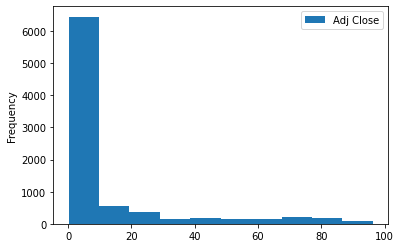

In [73]:
# 12.按照时间顺序可视化Adj Close值
apple.drop('Date',axis=1)
k = apple[['Adj Close']]
k.plot.hist(y='Adj Close')
plt.show()

In [74]:
# 13.数据中一共记录了多少个交易日
len(apple)

8465

In [75]:
# 14 最大涨幅是哪一天？
apple['lastdate'] = apple['Adj Close'].shift(-1)
apple['dt'] = apple['Adj Close'] - apple['lastdate']
apple[['Date','dt']].max()

Date    2014-07-08 00:00:00
dt                     6.79
dtype: object

In [76]:
# 15 最大跌幅是哪一天？
apple[['Date','dt']].min()

Date    1980-12-12 00:00:00
dt                    -8.75
dtype: object

In [77]:
# 16 每一日涨幅的中位数是多少？
apple['dt'].median()

0.0

In [78]:
# 17 涨幅最大的一个月是哪一月？
apple[['month','dt']].groupby('month').sum().sort_values('dt',ascending=False)

,dt
month,
2012-02,11.74
2012-08,7.83
2013-07,7.81
2012-03,7.80
2014-04,7.58
...,...
2008-09,-7.63
2014-01,-8.54
2008-01,-8.57


In [79]:
# 18 涨幅最大的一年是哪一年？
apple['year'] = apple['month'].apply(lambda x: x[:4])
apple[['year','dt']].groupby('year').sum().sort_values('dt',ascending=False)

,dt
year,
2012,18.01
2009,17.12
2014,16.12
2007,15.47
2010,15.27
2011,11.26
2013,5.92
2005,5.42
2004,2.94


In [80]:
# 19 你能否提出一种策略，使得你能获得尽可能高的收益？（*思考题）